In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests

In [2]:
# Updated Housing DF
re_df = pd.read_csv('./update_df.csv')

In [28]:
# Hospitalizations by zip
url = 'https://phl.carto.com/api/v2/sql?q=SELECT * FROM covid_hospitalizations_by_zip'
response = requests.request("GET", url)
hosp_zip = pd.json_normalize(response.json()['rows'])

In [29]:
# Deaths by zip
url = 'https://phl.carto.com/api/v2/sql?q=SELECT * FROM covid_deaths_by_zip'
response = requests.request("GET", url)
death_zip = pd.json_normalize(response.json()['rows'])

In [30]:
# Tests by zip
url = 'https://phl.carto.com/api/v2/sql?q=SELECT * FROM covid_cases_by_zip'
response = requests.request("GET", url)
test_zip = pd.json_normalize(response.json()['rows'])

In [99]:
re_df.head()

,property_id,prop_type,prop_sub_type,prop_status,price,baths_full,baths,beds,last_update,photo_count,...,state_code,county,lat,lon,neighborhood_name,buiding_size(sqft),lot_size(sqft),agent_id,agent_name,brand_name
0,M4046594895,condo,duplex_triplex,for_sale,249900,3.0,3,6.0,2020-10-13T17:54:05Z,9,...,PA,Philadelphia,39.974408,-75.243700,West Philadelphia,1632.0,1842.0,1291281.0,Ausra Anusauskas,Archstone Realty
1,M3939384476,condo,townhomes,for_sale,116800,1.0,1,3.0,2020-10-13T18:18:18Z,7,...,PA,Philadelphia,39.926283,-75.225382,Southwest Philadelphia,1092.0,992.0,347285.0,Dr Hanh Vo,Vihi Realty
2,M4036371277,condo,townhomes,for_sale,215000,1.0,2,3.0,2020-10-13T17:24:20Z,35,...,PA,Philadelphia,40.039721,-75.142100,Upper North District,1360.0,1501.0,NaN,Kevin Chen,Premium Realty Castor Inc
3,M3553029343,single_family,NaN,for_sale,394800,1.0,2,3.0,2020-10-13T17:11:54Z,123,...,PA,Philadelphia,40.071978,-75.073303,Near Northeast Philadelphia,1856.0,15913.0,4759.0,Carol Mallen,Re/Max Services
4,M3649199107,condo,townhomes,for_sale,130000,1.0,2,3.0,2020-10-13T17:02:13Z,33,...,PA,Philadelphia,40.012784,-75.156405,Upper North Philadelphia,1180.0,1240.0,391546.0,Maria Quattrone CEO,Re/Max @ Home - Philadelphia


In [407]:
re_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9562 entries, 0 to 9561
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   property_id         9562 non-null   object 
 1   prop_type           9562 non-null   object 
 2   prop_sub_type       7050 non-null   object 
 3   prop_status         9562 non-null   object 
 4   price               9562 non-null   int64  
 5   baths_full          7802 non-null   float64
 6   baths               9562 non-null   int64  
 7   beds                8380 non-null   float64
 8   last_update         9562 non-null   object 
 9   photo_count         9562 non-null   int64  
 10  page_no             9562 non-null   int64  
 11  rank                9562 non-null   int64  
 12  baths_half          3394 non-null   float64
 13  city                9562 non-null   object 
 14  line                9553 non-null   object 
 15  postal_code         9562 non-null   int64  
 16  state_

In [342]:
# Make a zip code median_price DF
price_median_by_zip = re_df.groupby('postal_code')['price'].median().rename_axis('zip_code').reset_index(name='median_price').sort_values('median_price', ascending=False)
price_median_by_zip.reset_index(drop=True, inplace=True)

In [343]:
price_median_by_zip.head()

,zip_code,median_price
0,19118,860000.0
1,19102,670000.0
2,19103,599900.0
3,19106,575000.0
4,19147,525000.0


In [344]:
price_median_by_zip.tail()

,zip_code,median_price
41,19139,127450.0
42,19142,115000.0
43,19140,80000.0
44,19133,52500.0
45,19132,50000.0


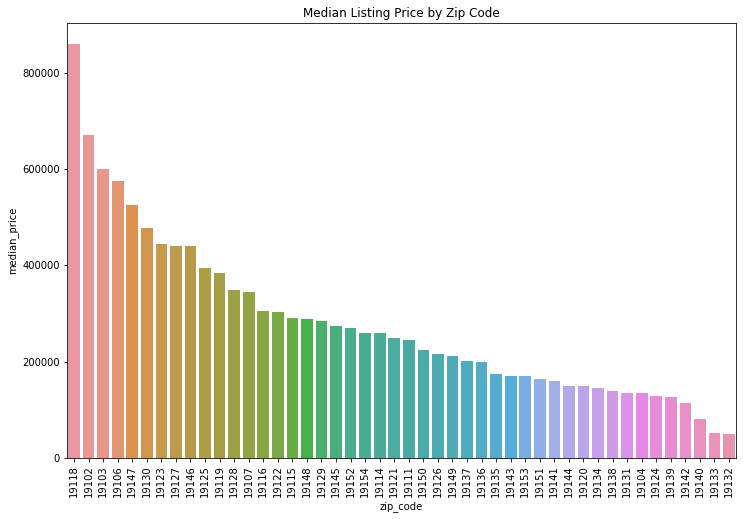

In [388]:
# Median listing price by zip code
plt.subplots(figsize=(12,8))
price_median_by_zip_plot = sns.barplot(x='zip_code', y='median_price', data=price_median_by_zip,
                             order=price_median_by_zip.sort_values('median_price', ascending=False)['zip_code'])
price_median_by_zip_plot.set_xticklabels(price_median_by_zip['zip_code'],rotation=90)
plt.title('Median Listing Price by Zip Code')
plt.show()

## Hospitalizations by Zip

In [305]:
hosp_zip.head()

,cartodb_id,the_geom,the_geom_webmercator,zip_code,hospitalized,count,etl_timestamp
0,1,None,None,19124,Yes,271,2020-10-24T17:20:02Z
1,2,None,None,19105,No_or_Unk,5,2020-10-24T17:20:02Z
2,3,None,None,19135,No_or_Unk,754,2020-10-24T17:20:02Z
3,4,None,None,19116,No_or_Unk,879,2020-10-24T17:20:02Z
4,5,None,None,19111,Yes,268,2020-10-24T17:20:02Z


In [32]:
# Make 'NO_UNKNOWN' more presentable and consistent with other responses
hosp_zip.loc[hosp_zip['hospitalized'] == 'NO_UNKNOWN', ['hospitalized']] = 'No_or_Unk'

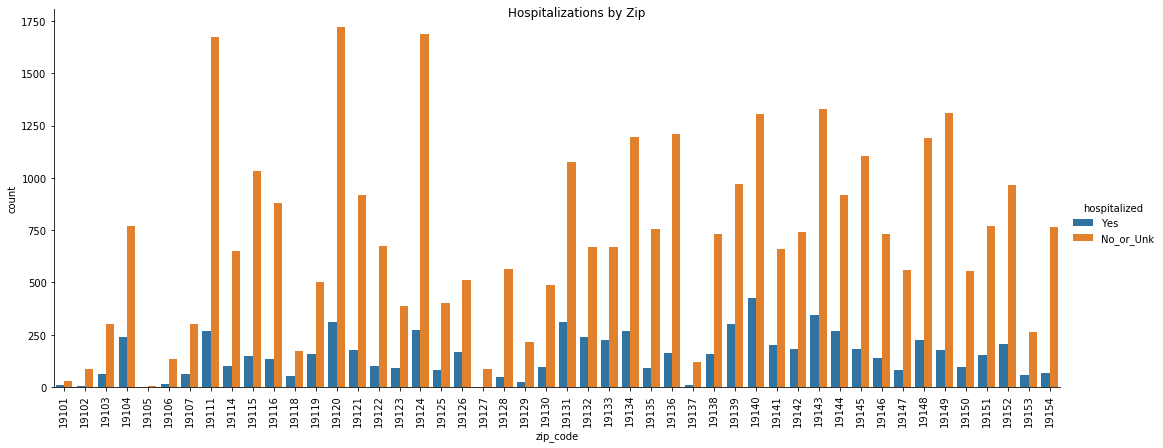

In [317]:
# Plot of hospitalizations by zip, whether hospitalized or not
hosp_zip_plot = sns.catplot(x = "zip_code", y = "count", hue = "hospitalized", data=hosp_zip,kind = "bar", height=6, aspect=2.5)
hosp_zip_plot.fig.suptitle('Hospitalizations by Zip')
hosp_zip_plot.set_xticklabels(rotation=90)
plt.show()

In [244]:
# Convert 'zip_code' to int64 for merging
hosp_zip['zip_code'] = hosp_zip['zip_code'].astype(int)

Build a dataframe for hospitalization rate by zip code

In [307]:
hosp_rate_df = pd.DataFrame(hosp_zip.groupby(['zip_code'], as_index=False)['count'].sum())

In [308]:
hosp_yes = hosp_zip[hosp_zip['hospitalized'] == 'Yes']

In [309]:
hosp_rate_df = hosp_rate_df.merge(hosp_yes, how = 'inner', on = 'zip_code', suffixes=('_total', '_yes'))

In [310]:
hosp_rate = []

for i in range(0, len(hosp_rate_df)):
    rate = hosp_rate_df['count_yes'][i] / hosp_rate_df['count_total'][i]
    hosp_rate.append(rate)
    
hosp_rate_df['hospitalization_rate'] = hosp_rate
hosp_rate_df = hosp_rate_df.sort_values('hospitalization_rate', ascending=False).reset_index(drop=True)

In [319]:
hosp_rate_df.head()

,zip_code,count_total,cartodb_id,the_geom,the_geom_webmercator,hospitalized,count_yes,etl_timestamp,hospitalization_rate
0,19132,911,60,None,None,Yes,239,2020-10-24T17:20:02Z,0.262349
1,19133,897,89,None,None,Yes,227,2020-10-24T17:20:02Z,0.253066
2,19101,40,73,None,None,Yes,10,2020-10-24T17:20:02Z,0.250000
3,19140,1733,30,None,None,Yes,427,2020-10-24T17:20:02Z,0.246394
4,19126,677,29,None,None,Yes,166,2020-10-24T17:20:02Z,0.245199


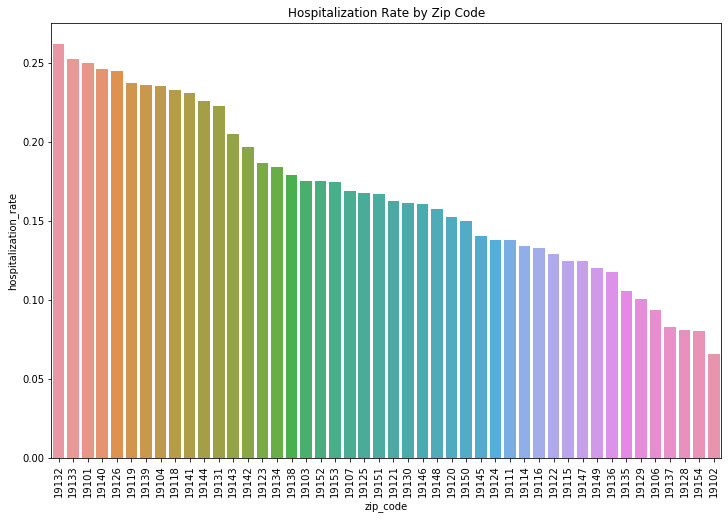

In [318]:
# Hospitalization rate by zip code
plt.subplots(figsize=(12,8))
hosp_rate_df_plot = sns.barplot(x='zip_code', y='hospitalization_rate', data=hosp_rate_df,
                               order=hosp_rate_df.sort_values('hospitalization_rate', ascending=False)['zip_code'])
hosp_rate_df_plot.set_xticklabels(hosp_rate_df['zip_code'],rotation=90)
plt.title('Hospitalization Rate by Zip Code')
plt.show()

In [346]:
# Merge DFs for hospitalization rate by zip median
hosp_rate_by_median = hosp_yes.merge(price_median_by_zip, how = 'inner', on = 'zip_code')

In [385]:
# Get rate of hospitalization in reference to median listing price by zip
hosp_rate_median_price_list = []

for i in range(0, len(hosp_rate_by_median)):
    rate = round(hosp_rate_by_median['count'][i] / hosp_rate_by_median['median_price'][i], 4)
    hosp_rate_median_price_list.append(rate)
    
hosp_rate_by_median['rate_by_median_list_price'] = hosp_rate_median_price_list
hosp_rate_by_median = hosp_rate_by_median.sort_values('rate_by_median_list_price', ascending=False).reset_index(drop=True)

In [386]:
hosp_rate_by_median.head()

,cartodb_id,the_geom,the_geom_webmercator,zip_code,hospitalized,count,etl_timestamp,median_price,rate_by_median_list_price
0,30,None,None,19140,Yes,427,2020-10-24T17:20:02Z,80000.0,0.0053
1,60,None,None,19132,Yes,239,2020-10-24T17:20:02Z,50000.0,0.0048
2,89,None,None,19133,Yes,227,2020-10-24T17:20:02Z,52500.0,0.0043
3,6,None,None,19139,Yes,301,2020-10-24T17:20:02Z,127450.0,0.0024
4,23,None,None,19131,Yes,309,2020-10-24T17:20:02Z,135000.0,0.0023


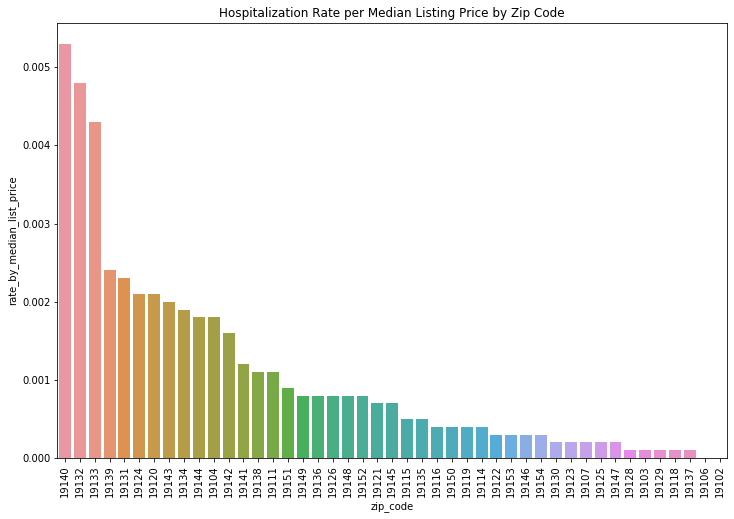

In [387]:
# Hospitalizations by zip divided by corresponding zip median listing price
plt.subplots(figsize=(12,8))
hosp_rate_median_list_plot = sns.barplot(x='zip_code', y='rate_by_median_list_price', data=hosp_rate_by_median,
                               order=hosp_rate_by_median.sort_values('rate_by_median_list_price', ascending=False)['zip_code'])
hosp_rate_median_list_plot.set_xticklabels(hosp_rate_by_median['zip_code'],rotation=90)
plt.title('Hospitalization Rate per Median Listing Price by Zip Code')
plt.show()

## Test outcome by zip

In [97]:
test_zip.head()

,cartodb_id,the_geom,the_geom_webmercator,covid_status,zip_code,count,etl_timestamp
0,1,None,None,NEG,19140,14492,2020-10-24T17:20:02Z
1,2,None,None,POS,19127,88,2020-10-24T17:20:02Z
2,3,None,None,NEG,19133,6606,2020-10-24T17:20:02Z
3,4,None,None,POS,19146,871,2020-10-24T17:20:02Z
4,5,None,None,NEG,19138,7885,2020-10-24T17:20:02Z


In [142]:
# convert 'zip_code' to int64 for merging
test_zip['zip_code'] = test_zip['zip_code'].astype(int)

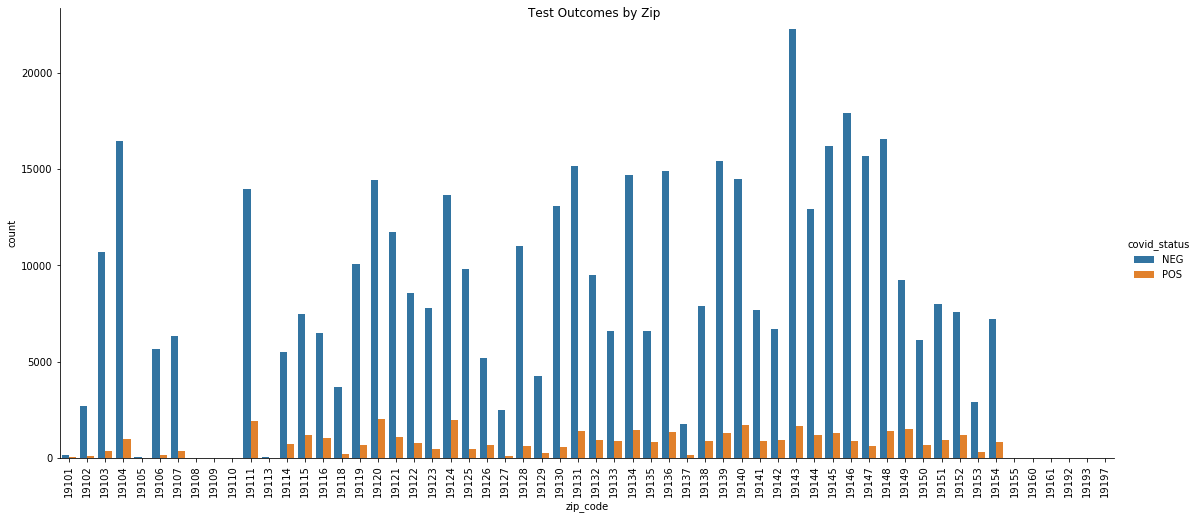

In [123]:
# Test outcomes by zip
test_zip_plot = sns.catplot(x = "zip_code", y = "count", hue = "covid_status", data=test_zip, kind = "bar", height=7, aspect=2.25)
test_zip_plot.fig.suptitle('Test Outcomes by Zip')
test_zip_plot.set_xticklabels(rotation=90)
plt.show()

Build a dataframe for positive cases by zip divided by corresponding median listing price.

In [147]:
new_df = test_zip.merge(price_median_by_zip, how = 'inner', on = 'zip_code')

In [148]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cartodb_id            92 non-null     int64  
 1   the_geom              0 non-null      object 
 2   the_geom_webmercator  0 non-null      object 
 3   covid_status          92 non-null     object 
 4   zip_code              92 non-null     int64  
 5   count                 92 non-null     int64  
 6   etl_timestamp         92 non-null     object 
 7   median_price          92 non-null     float64
dtypes: float64(1), int64(3), object(4)
memory usage: 6.5+ KB


In [182]:
new_df.sort_values('median_price', ascending=False).head()

,cartodb_id,the_geom,the_geom_webmercator,covid_status,zip_code,count,etl_timestamp,median_price
44,26,None,None,POS,19118,223,2020-10-24T17:20:02Z,860000.0
45,100,None,None,NEG,19118,3670,2020-10-24T17:20:02Z,860000.0
53,50,None,None,POS,19102,91,2020-10-24T17:20:02Z,670000.0
52,40,None,None,NEG,19102,2704,2020-10-24T17:20:02Z,670000.0
77,102,None,None,POS,19103,365,2020-10-24T17:20:02Z,599900.0


In [184]:
new_df.sort_values('median_price', ascending=False).tail()

,cartodb_id,the_geom,the_geom_webmercator,covid_status,zip_code,count,etl_timestamp,median_price
0,1,None,None,NEG,19140,14492,2020-10-24T17:20:02Z,80000.0
5,39,None,None,POS,19133,897,2020-10-24T17:20:02Z,52500.0
4,3,None,None,NEG,19133,6606,2020-10-24T17:20:02Z,52500.0
63,95,None,None,POS,19132,911,2020-10-24T17:20:02Z,50000.0
62,47,None,None,NEG,19132,9517,2020-10-24T17:20:02Z,50000.0


In [197]:
pos_df = new_df[new_df['covid_status'] == 'POS']
pos_df = pos_df.reset_index(drop=True)

In [408]:
## Postive case rate by zip code median listing price
case_rate_by_zip_median = []

for i in range(0, len(pos_df['count'])):
    rate = round(pos_df['count'][i] / pos_df['median_price'][i], 4)
    case_rate_by_zip_median.append(rate)

In [409]:
pos_df['case_rate_by_zip_median'] = case_rate_by_zip_median

In [411]:
# pos_df.drop(['cartodb_id', 'the_geom', 'the_geom_webmercator', 'etl_timestamp'], axis=1, inplace=True)

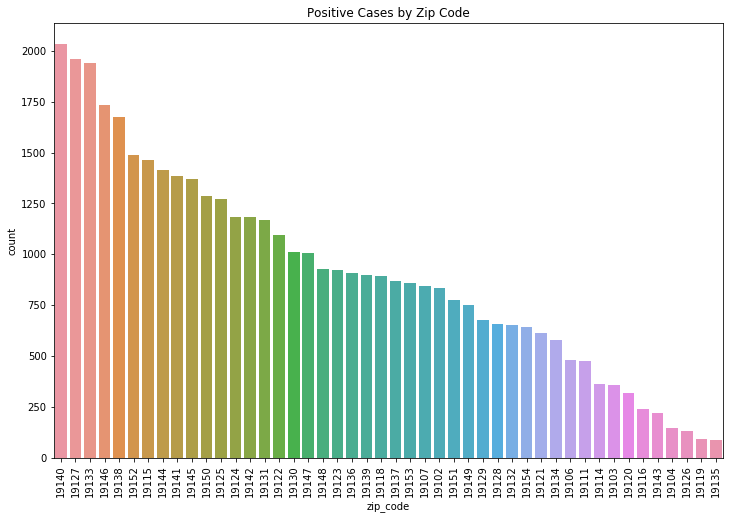

In [412]:
# Positive cases count by zip
plt.subplots(figsize=(12,8))
pos_case_by_zip_plot = sns.barplot(x='zip_code', y='count', data=pos_df,
                             order=pos_df.sort_values('count', ascending=False)['zip_code'])
pos_case_by_zip_plot.set_xticklabels(pos_df['zip_code'],rotation=90)
plt.title('Positive Cases by Zip Code')
plt.show()

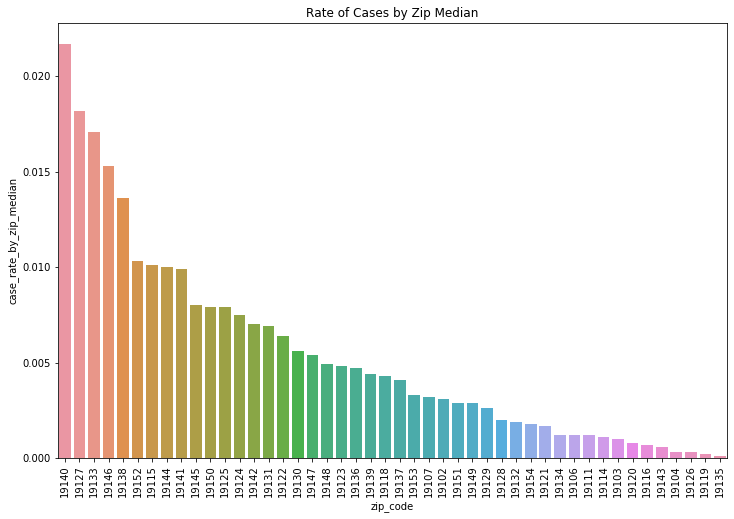

In [413]:
# Positive cases by zip divided by median price listing
plt.subplots(figsize=(12,8))
case_by_zip_median_plot = sns.barplot(x='zip_code', y='case_rate_by_zip_median', data=pos_df,
                             order=pos_df.sort_values('case_rate_by_zip_median', ascending=False)['zip_code'])
case_by_zip_median_plot.set_xticklabels(pos_df['zip_code'],rotation=90)
plt.title('Rate of Cases by Zip Median')
plt.show()

## Deaths by Zip

In [414]:
death_zip.head()

,cartodb_id,the_geom,the_geom_webmercator,zip_code,covid_outcome,count,etl_timestamp
0,1,None,None,19107,DIED,10,2020-10-24T17:20:02Z
1,2,None,None,19132,DIED,39,2020-10-24T17:20:02Z
2,3,None,None,19111,DIED,74,2020-10-24T17:20:02Z
3,4,None,None,19115,DIED,119,2020-10-24T17:20:02Z
4,5,None,None,19136,DIED,74,2020-10-24T17:20:02Z


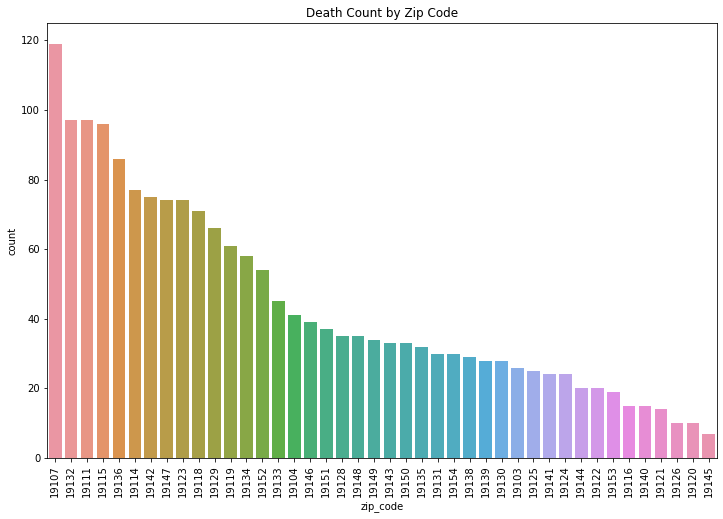

In [221]:
# Death count by zip
plt.figure(figsize=(12,8))
death_zip_plot = sns.barplot(x='zip_code', y='count', data=death_zip,
                             order=death_zip.sort_values('count', ascending=False)['zip_code'])
death_zip_plot.set_xticklabels([i for i in death_zip['zip_code']], rotation=90)
plt.title('Death Count by Zip Code')
plt.show()

Build dataframe for deaths by zip divided by median listing price for corresponding zip.

In [224]:
death_zip['zip_code'] = death_zip['zip_code'].astype(int)
death_merge = death_zip.merge(price_median_by_zip, how = 'inner', on = 'zip_code')

In [399]:
## Death rate by median listing price
death_rate_by_zip_median = []

for i in range(0, len(death_merge['count'])):
    rate = round(death_merge['count'][i] / death_merge['median_price'][i], 5) * 100
    death_rate_by_zip_median.append(rate)

death_merge['death_rate_by_zip_median'] = death_rate_by_zip_median
death_merge = death_merge.sort_values('death_rate_by_zip_median', ascending=False).reset_index(drop=True)

In [400]:
death_merge.head()

,cartodb_id,the_geom,the_geom_webmercator,zip_code,covid_outcome,count,etl_timestamp,median_price,death_rate_by_zip_median
0,2,None,None,19132,DIED,39,2020-10-24T17:20:02Z,50000.0,0.078
1,38,None,None,19140,DIED,61,2020-10-24T17:20:02Z,80000.0,0.076
2,25,None,None,19131,DIED,97,2020-10-24T17:20:02Z,135000.0,0.072
3,34,None,None,19144,DIED,97,2020-10-24T17:20:02Z,150000.0,0.065
4,16,None,None,19104,DIED,77,2020-10-24T17:20:02Z,134000.0,0.057


In [402]:
death_merge.tail()

,cartodb_id,the_geom,the_geom_webmercator,zip_code,covid_outcome,count,etl_timestamp,median_price,death_rate_by_zip_median
37,31,None,None,19125,DIED,15,2020-10-24T17:20:02Z,394900.0,0.004
38,10,None,None,19118,DIED,24,2020-10-24T17:20:02Z,860000.0,0.003
39,8,None,None,19147,DIED,14,2020-10-24T17:20:02Z,525000.0,0.003
40,1,None,None,19107,DIED,10,2020-10-24T17:20:02Z,344500.0,0.003
41,11,None,None,19129,DIED,7,2020-10-24T17:20:02Z,284950.0,0.002


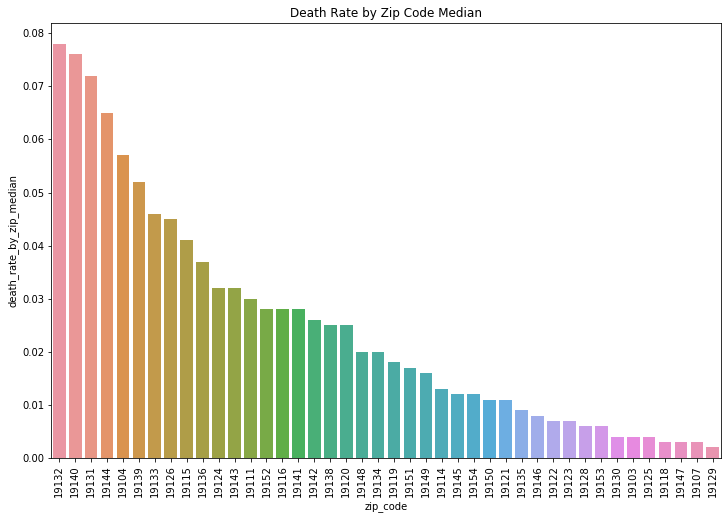

In [401]:
# Death count by zip divided by median listing price for corresponding zip
plt.subplots(figsize=(12,8))
death_merge_plot = sns.barplot(x='zip_code', y='death_rate_by_zip_median', data=death_merge,
                             order=death_merge.sort_values('death_rate_by_zip_median', ascending=False)['zip_code'])
death_merge_plot.set_xticklabels(death_merge['zip_code'],rotation=90)
plt.title('Death Rate by Zip Code Median')
plt.show()